In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('HSG Historical Data.csv')
df1=df.reset_index()['Price']
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)


c:\Users\hangt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.1237
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0049
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0027
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0017
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0016
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0013
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0012
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0011
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0010
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0011
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 9.9454e-04
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 8.3010e-04
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 8.9673e-04
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38

In [2]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)
# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)
# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Testing RMSE: 266.4784821976476
Testing MAE: 240.46096540178576
Testing MAPE: 0.04652813908425365


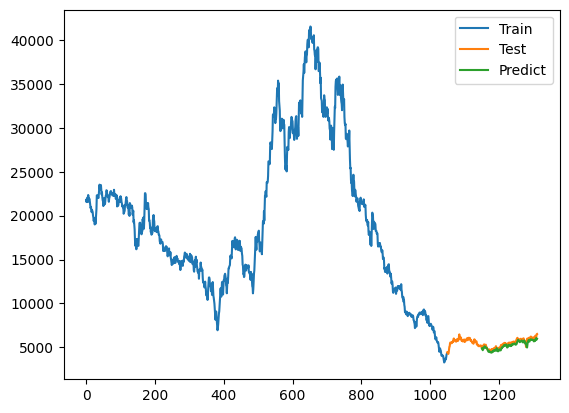

In [3]:
# 14.Vẽ hình
# Train
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
# Test
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
# Dự đoán trên tập test
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

# Dự đoán 30 ngày tiếp theo

In [4]:

# 13. Predict the next 30 days
x_input = test_data[-100:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

[0.07720486]
101
1 day input [0.05544331 0.05563411 0.05563411 0.05846221 0.05789503 0.05770683
 0.05808322 0.05525512 0.05186244 0.05035168 0.05261521 0.05487873
 0.05525512 0.05676326 0.05563411 0.0560105  0.0588386  0.05940579
 0.05412335 0.0531824  0.05582231 0.05714226 0.05940579 0.05997036
 0.05978217 0.05902679 0.05940579 0.05902679 0.0616667  0.06072574
 0.06091393 0.06242208 0.06034674 0.05827402 0.05827402 0.06072574
 0.0616667  0.06147851 0.0675137  0.07015361 0.07241714 0.07336071
 0.0707208  0.06807828 0.06902185 0.06807828 0.06770189 0.06789009
 0.06732551 0.06902185 0.07015361 0.0707208  0.06902185 0.06713732
 0.06506199 0.06732551 0.06789009 0.06789009 0.07184995 0.07166176
 0.06506199 0.06430661 0.06487379 0.05940579 0.05940579 0.0552891
 0.04620363 0.05220485 0.06249003 0.0707208  0.07003338 0.06951846
 0.0712331  0.07157812 0.07329014 0.07294773 0.07346265 0.07089069
 0.07140561 0.07534979 0.07723432 0.07260533 0.06951846 0.07020589
 0.07466237 0.07192052 0.0710632  

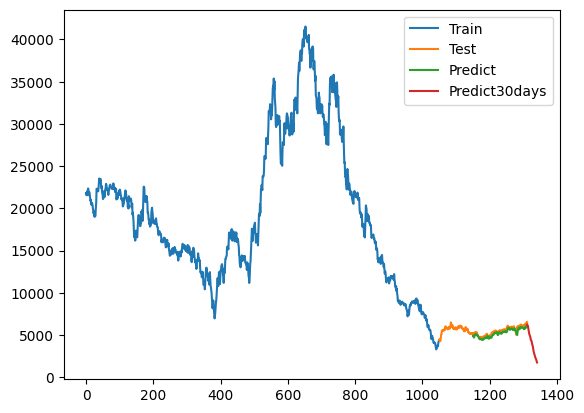

In [5]:

# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

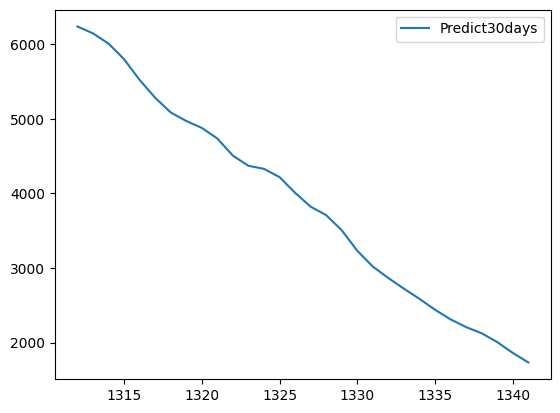

In [6]:
# 14.Vẽ hình
# Dự đoán 30 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Predict30days'])
plt.show()

In [7]:
print(scaler.inverse_transform(lst_output))

[[6236.57304683]
 [6144.50584378]
 [6007.5302781 ]
 [5798.86295614]
 [5520.71444854]
 [5281.55393645]
 [5084.83595317]
 [4969.97721092]
 [4877.24712173]
 [4735.43039209]
 [4505.70706405]
 [4369.49215702]
 [4328.35901007]
 [4218.38832268]
 [4008.19041928]
 [3821.52953475]
 [3708.4110646 ]
 [3506.04331669]
 [3231.11750682]
 [3019.18257378]
 [2865.15511368]
 [2722.6121453 ]
 [2586.26843083]
 [2440.92519252]
 [2311.50062831]
 [2208.09381071]
 [2125.7525484 ]
 [2007.40435412]
 [1862.36298483]
 [1733.91757087]]
